In [2]:
pwd

'C:\\Users\\User\\OneDrive - Engenuity (Pvt) Ltd\\Github\\SPE-testing'

In [1]:
import os
from Utils.read_coord import kml_coord
from Utils.sentinal_request import senti_api
from Utils.forest_cover import get_cover
from Utils.seques_forecast import plot_SEQ
from Utils.map_view import map_show
from Utils.tree_count import count_trees

Enter kml file path: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
The file exists
Forecasting for one tree type
Enter the tree type: Rubber
Enter the tree count: 78
Rubber


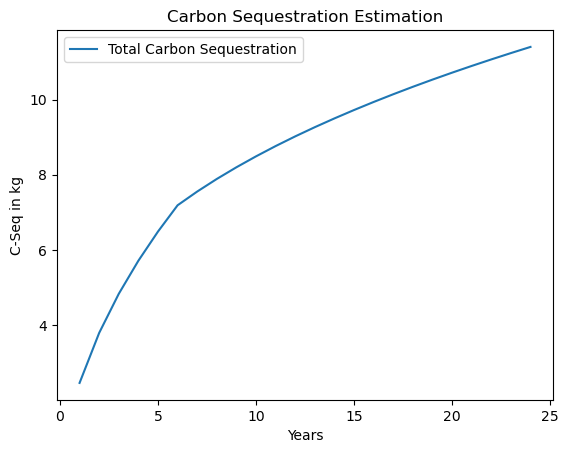

resolution 10
Total Land Area 0.28 km2
Forest/ Green area:  0.2272 km2
Forest/green cover:  81.14 %


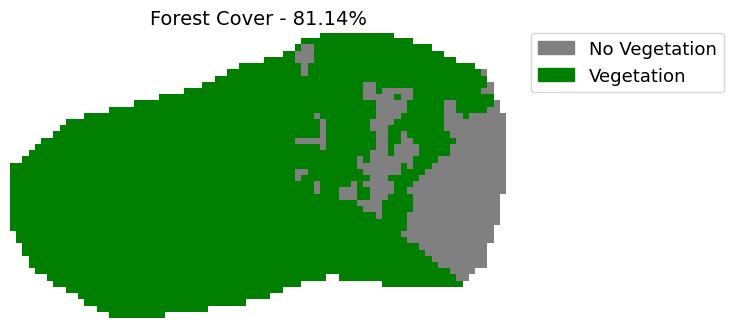

In [3]:
file_path = input('Enter kml file path: ')
print(file_path)
#C:\Users\Harith\EngenuityAI\SPE\SPE-development\sentinal\gAMPOLA TEST SITE 2.kml
if os.path.exists(file_path):
    print('The file exists')

    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()

        #print(lines)
else:
    print('The specified file does NOT exist')



# getting polygon coordinates
poly_coord = kml_coord(file_path)
#print(poly_coord)

# show the map view
map_show(poly_coord)


# CO2 forecasting
print("Forecasting for one tree type")
tree_type = input('Enter the tree type: ')
n_tree = input('Enter the tree count: ')
n_tree = int(n_tree)
print(tree_type)
plot_SEQ(tree_type,n_tree)

img,resol = senti_api(poly_coord)
print('resolution',resol)
#print(img.shape)
#print(img[:,:,2][40][10])
forest_area,forest_cover,green_pix = get_cover(img,resol)


import numpy as np
import pandas as pd


def count_trees(res,green_pixel,spacing):
    
    # Count no of trees per pixel
    tree_per_pixel = (res*res)/(spacing*spacing)
    tree_count = round(green_pixel*tree_per_pixel)
    
    print('Estimated No of Trees: ',tree_count)
    return tree_count

In [8]:
spacing = 4
count_trees(resol,green_pix,spacing)

Estimated No of Trees:  14200


14200

## Check a pipeline

Enter kml file path: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
The file exists
Forecasting for one tree type
Enter the tree type: Rubber
Enter the tree count: 47
Enter the spacing between the trees: 8
resolution 10
Total Land Area 0.28 km2
Forest/ Green area:  0.2272 km2
Forest/green cover:  81.14 %


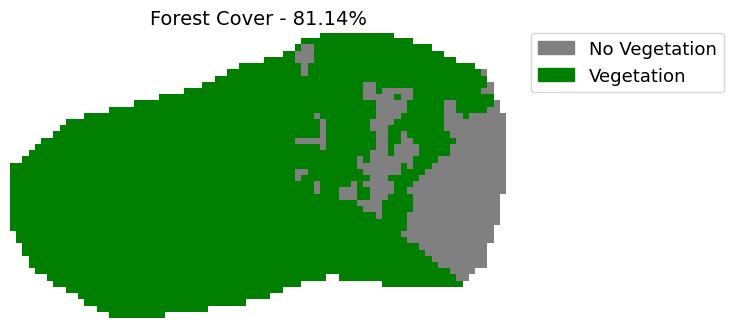

green_pix 2272
Rubber


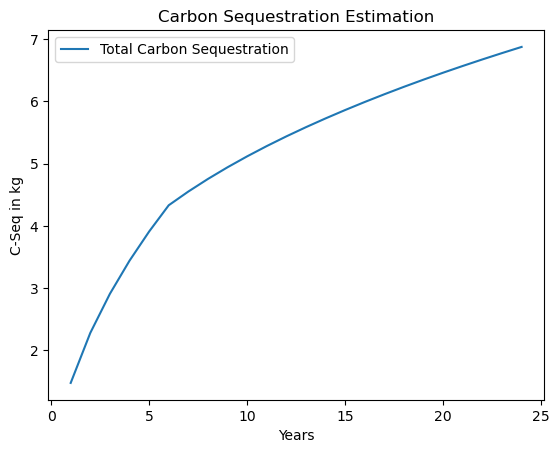

Estimated No of Trees:  3550


3550

In [9]:
file_path = input('Enter kml file path: ')
print(file_path)
#C:\Users\Harith\EngenuityAI\SPE\SPE-development\sentinal\gAMPOLA TEST SITE 2.kml
if os.path.exists(file_path):
    print('The file exists')

    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()

        #print(lines)
else:
    print('The specified file does NOT exist')
    
# getting polygon coordinates
poly_coord = kml_coord(file_path)
#print(poly_coord)

# show the map view
map_show(poly_coord)

    
# User inputs
print("Forecasting for one tree type")
tree_type = input('Enter the tree type: ')
n_tree = input('Enter the tree count: ')
n_tree = int(n_tree)
spacing = input('Enter the spacing between the trees in meters: ')
spacing = int(spacing)


img,resol = senti_api(poly_coord)
print('resolution',resol)
#print(img.shape)
#print(img[:,:,2][40][10])
forest_area,forest_cover,green_pix = get_cover(img,resol)
print('green_pix',green_pix)


# CO2 forecasting
print(tree_type)
plot_SEQ(tree_type,n_tree)

count_trees(resol,green_pix,spacing)